# NYPD Motor Vehicle Collision Exploratory Analysis
____
Micaela Flores (mrf444), Laureano Nisenbaum (lvn218), Jason Li (yl2813), Trevor Mitchell (tim225)

### Cleaning the Data: Cleaning from Raw Data and Regrouping Accident Causes (Micaela)

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

from sklearn.preprocessing import LabelEncoder

def cleanData(filename,startdate,enddate):
    df = pd.read_csv(filename)
    
    #convert date column to datetime objects
    df["DATE"] = pd.to_datetime(df["DATE"]) #takes a bit to run 
    
    start, end = pd.to_datetime([startdate,enddate],format='%d%b%Y')
    
    #filter out only dates starting from start date and ending with end date
    df = df[(df["DATE"] >= start) & (df["DATE"] <= end)]
    
    #drop all rows that contain NaN in the Borough and Zip Code column 
    df = df.dropna(subset=["BOROUGH","ZIP CODE"])
    
    #change Time column to datetime objects
    df['TIME'] = pd.to_datetime(df['TIME'],format= '%H:%M' ).dt.time
    
    #change Zip Code column to integers
    df['ZIP CODE'] = df['ZIP CODE'].astype('int64')
    
    #only get relevant columns
    df = df.drop(["LOCATION","ON STREET NAME","CROSS STREET NAME",\
         "OFF STREET NAME","CONTRIBUTING FACTOR VEHICLE 3","CONTRIBUTING FACTOR VEHICLE 4",\
         "CONTRIBUTING FACTOR VEHICLE 5","UNIQUE KEY","VEHICLE TYPE CODE 1",
         "VEHICLE TYPE CODE 2","VEHICLE TYPE CODE 3","VEHICLE TYPE CODE 4","VEHICLE TYPE CODE 5"],axis=1)
    df = df.loc[df["CONTRIBUTING FACTOR VEHICLE 1"] != "Unspecified"] #"LATITUDE","LONGITUDE"
    
    #encode the string accident causes into categorical numbers for later grouping
    le = LabelEncoder()
    df.insert(13,'REASON',le.fit_transform(df['CONTRIBUTING FACTOR VEHICLE 1'].astype(str)))
    map_key = dict(zip(le.classes_, le.transform(le.classes_))) #for our purposes to know how numbers match up
    
    reason_map = {9:'Distracted Driving',33:'Distracted Driving',14:'Distracted Driving',6:'Distracted Driving',\
              7:'Distracted Driving',8:'Distracted Driving',28:'Distracted Driving',25:'Distracted Driving',\
              54:'Distracted Driving',45:'Distracted Driving',18:'Impaired Driving',2:'Impaired Driving',\
              22:'Impaired Driving',23:'Impaired Driving',17:'Impaired Driving',26:'Impaired Driving',\
              39:'Impaired Driving',12:'Impaired Driving',13:'Impaired Driving',40:'Impaired Driving',\
              4:'Bad Driving',52:'Bad Driving',34:'Bad Driving',16:'Bad Driving', 19:'Bad Driving', \
              35:'Bad Driving',53:'Bad Driving',51:'Bad Driving',10:'Bad Driving',1:'Bad Driving',\
              50:'Bad Driving',15:'Bad Driving', 56:'Poor Driving Conditions',20:'Poor Driving Conditions',\
              27:'Poor Driving Conditions',37:'Poor Driving Conditions',24:'Unsafe Infrastructure',\
              36:'Unsafe Infrastructure',49:'Unsafe Infrastructure',29:'Unsafe Infrastructure',\
              43:'Unsafe Infrastructure', 30:'External Factor', 38:'External Factor',3:'External Factor',\
              31:'External Factor',41:'External Factor',42:'External Factor',47:'Mechanical Failure',\
              5:'Mechanical Failure',44:'Mechanical Failure',0:'Mechanical Failure',21:'Mechanical Failure',\
              48:'Mechanical Failure',57:'Mechanical Failure',32:'Other',55:'Other',46:'Other',11:'Other',58:'Other'}
    
    #group into our designated categories
    df['REASON'] = df['REASON'].map(reason_map)
    
    return df

In [4]:
df = cleanData("NYPD_Motor_Vehicle_Collisions.csv","1NOV2017","31OCT2018")
#print("Size of data after cleaning: ",df.shape)
#df.head(5)

/Users/JasonLi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


### Import Zipcode Shape file (Jason)

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
def cleanDataZipCode(filename):
    Zipcode_shape = gpd.read_file(filename)
    Zipcode_shape = Zipcode_shape.drop(['BLDGZIP','STATE','ST_FIPS','CTY_FIPS','URL','SHAPE_AREA','SHAPE_LEN',\
                                    'AREA','PO_NAME'],axis=1)
    Zipcode_shape["ZIPCODE"] = Zipcode_shape["ZIPCODE"].astype(str).astype(int)
    return Zipcode_shape

In [4]:
df_zipcode = cleanDataZipCode("ZIP_CODE_040114/ZIP_CODE_040114.shp")
#df_zipcode.head(5)
df_zipcode

,ZIPCODE,POPULATION,COUNTY,geometry
0,11436,18681.0,Queens,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,62426.0,Kings,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,83866.0,Kings,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,56527.0,Kings,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,72280.0,Kings,"POLYGON ((991997.1134308875 176307.4958601296,..."
5,11226,106132.0,Kings,"POLYGON ((994821.4729396403 177865.7178093046,..."
6,11219,92561.0,Kings,"POLYGON ((987286.3515269756 173946.4621963799,..."
7,11210,67067.0,Kings,"POLYGON ((995796.0097044706 171110.0666224658,..."
8,11230,80857.0,Kings,"POLYGON ((994099.2959063053 171240.7064530551,..."
9,11204,77354.0,Kings,"POLYGON ((989500.1699339747 170730.1687602103,..."


In [3]:
#Create new csv files instead of cleaning data everytime
#df.to_csv('cleaned_df.csv')
df = pd.read_csv('cleaned_df.csv').drop(['Unnamed: 0'], axis=1)

In [6]:
df.groupby('ZIP CODE').size()

ZIP CODE
10000      51
10001    1386
10002    1213
10003     714
10004     164
10005      74
10006      95
10007     364
10009     333
10010     601
10011    1010
10012     675
10013    1255
10014     353
10016    1347
10017     800
10018    1103
10019    1659
10020      50
10021     385
10022    1301
10023     644
10024     493
10025     399
10026     239
10027     574
10028     329
10029     595
10030     242
10031     244
         ... 
11379     415
11385    1287
11411     223
11412     388
11413     645
11414     402
11415     244
11416     420
11417     638
11418     656
11419     763
11420     975
11421     483
11422     568
11423     442
11426     167
11427     253
11428     191
11429     282
11430      33
11432    1038
11433     608
11434    1096
11435     792
11436     229
11691     559
11692     153
11693     162
11694     181
11697      21
Length: 214, dtype: int64

In [6]:
## Return a Dataframe for each Borough
#def Merge_twoDFbyZC(df_zipcode,main_df):
#    result = df_zipcode.merge(df, left_on='ZIPCODE', right_on='ZIP CODE', how='inner').drop(['ZIP CODE'],axis = 1)
#    return result
#new_df = Merge_twoDFbyZC(df_zipcode,df)

### HEATMAP (Group by Zipcode and Borough) (Jason)

In [6]:
def groupby_all(borough_df,df):
    temp_df = df.groupby(['ZIP CODE','BOROUGH','REASON']).size().unstack(2).reset_index().fillna(0)
    temp_df.columns.name = ''
    result = borough_df.merge(temp_df, left_on='ZIPCODE', right_on='ZIP CODE', how='inner').drop('ZIP CODE', axis = 1)
    return result

In [7]:
df_groupall = groupby_all(df_zipcode,df)

In [8]:
df_groupall[['Bad Driving Per Cap','Distracted Driving Per Cap', 'External Factor Per Cap',\
             'Poor Driving Conditions Per Cap','Unsafe Infrastructure Per Cap','Mechanical Failure Per Cap'\
             ,'Other Per Cap','Impaired Driving Per Cap']] \
= df_groupall[['Bad Driving','Distracted Driving','External Factor','Poor Driving Conditions'\
               ,'Unsafe Infrastructure','Mechanical Failure','Other','Impaired Driving']\
             ].div(df_groupall['POPULATION'].values,axis=0)

In [9]:
Brooklyn = df_groupall[df_groupall['BOROUGH'] == 'BROOKLYN']
Bronx = df_groupall[df_groupall['BOROUGH'] == 'BRONX']
Manhattan = df_groupall[df_groupall['BOROUGH'] == 'MANHATTAN']
#No one lives in Central Park
Manhattan = Manhattan[Manhattan['POPULATION'] != 0]
Queens = df_groupall[df_groupall['BOROUGH'] == 'QUEENS']
Queens = Queens[Queens['POPULATION'] != 0]
Staten_Island = df_groupall[df_groupall['BOROUGH'] == 'STATEN ISLAND']

In [10]:
Queens.loc[Queens['ZIPCODE'] == 11430, ~Queens.\
           columns.isin(['ZIPCODE', 'POPULATION', 'COUNTY', 'geometry','BOROUGH'])] = 0
#df['column_name'] == some_value

In [11]:
Queens[Queens['POPULATION'] == 0]

,ZIPCODE,POPULATION,COUNTY,geometry,BOROUGH,Bad Driving,Distracted Driving,External Factor,Impaired Driving,Mechanical Failure,...,Poor Driving Conditions,Unsafe Infrastructure,Bad Driving Per Cap,Distracted Driving Per Cap,External Factor Per Cap,Poor Driving Conditions Per Cap,Unsafe Infrastructure Per Cap,Mechanical Failure Per Cap,Other Per Cap,Impaired Driving Per Cap


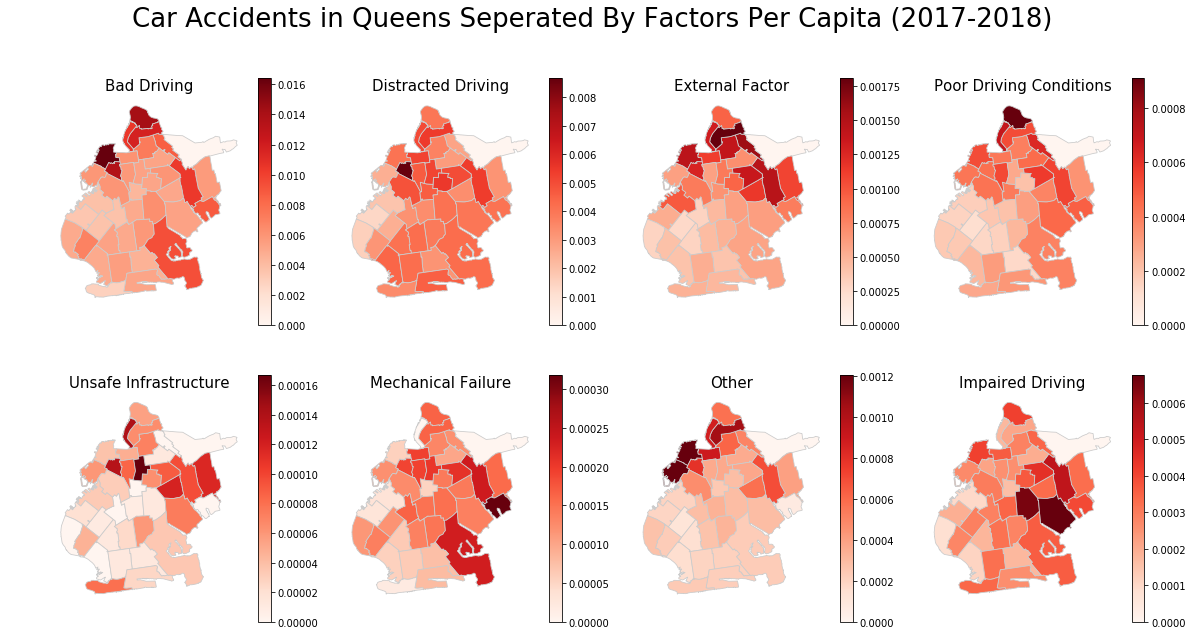

In [13]:
import matplotlib.pyplot as plt
# set a variable that will call whatever column we want to visualise on the map
#variable = "Distracted Driving"
var_list = ['Bad Driving Per Cap','Distracted Driving Per Cap', 'External Factor Per Cap']#,\
             #'Poor Driving Conditions Per Cap','Unsafe Infrastructure Per Cap','Mechanical Failure Per Cap'\
             #,'Other Per Cap','Impaired Driving Per Cap']
title_list = ['Bad Driving','Distracted Driving','External Factor']#,'Poor Driving Conditions'\
               #,'Unsafe Infrastructure','Mechanical Failure','Other','Impaired Driving']
# create figure and axes for Matplotlib
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
counter = 0
for row in range(0,2):
    for item in range(0,4):
        Brooklyn.plot(column=var_list[counter], cmap='Reds', linewidth=0.8, ax=ax[row, item], edgecolor='0.8')
        # set the range for the choropleth
        vmin, vmax = 0, float(max(Brooklyn[var_list[counter]]))
        ax[row, item].axis('off')
        ax[row, item].set_title(title_list[counter],fontsize=15)
        # Create colorbar as a legend
        sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
        # empty array for the data range
        sm._A = []
        # add the colorbar to the figure
        cbar = fig.colorbar(sm,ax=ax[row, item])
        counter += 1

fig.suptitle("Car Accidents in Queens Seperated By Factors Per Capita (2017-2018)",fontsize=26)
# create an annotation for the data source
#plt.annotate('Source: NYC Open Data, 2018',xy=(0.2, .15),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
plt.show()

In [94]:
total = Brooklyn.append(Bronx, ignore_index=True)
total = total.append(Manhattan, ignore_index=True)
total = total.append(Queens, ignore_index=True)
total = total.append(Staten_Island, ignore_index=True)
#Queens = Queens[Queens['POPULATION'] != 0]
#Staten_Island = df_groupall[df_groupall['BOROUGH'] == 'STATEN ISLAND']

In [170]:
#total

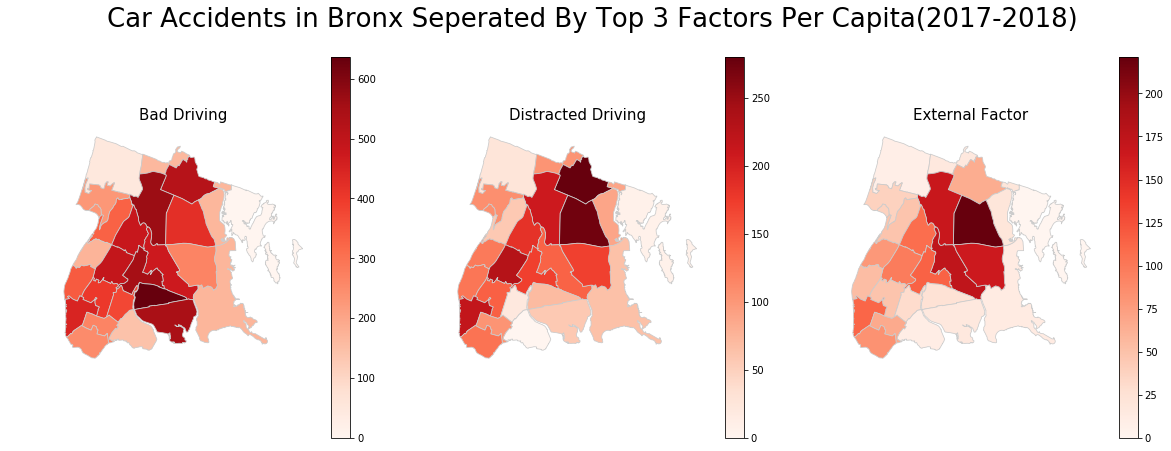

In [176]:
# set a variable that will call whatever column we want to visualise on the map
#variable = "Distracted Driving"
#var_list = ['Bad Driving Per Cap','Distracted Driving Per Cap', 'External Factor Per Cap']
var_list = ['Bad Driving','Distracted Driving', 'External Factor']#,\
             #'Poor Driving Conditions Per Cap','Unsafe Infrastructure Per Cap','Mechanical Failure Per Cap'\
             #,'Other Per Cap','Impaired Driving Per Cap']
title_list = ['Bad Driving','Distracted Driving','External Factor']#,'Poor Driving Conditions'\
               #,'Unsafe Infrastructure','Mechanical Failure','Other','Impaired Driving']
# create figure and axes for Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))
counter = 0
for row in range(0,3):
    #for item in range(0,4):
    Bronx.plot(column=var_list[counter], cmap='Reds', linewidth=0.8, ax=ax[row], edgecolor='0.8')
    # set the range for the choropleth
    vmin, vmax = 0, float(max(Bronx[var_list[counter]]))
    ax[row].axis('off')
    ax[row].set_title(title_list[counter],fontsize=15)
    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # empty array for the data range
    sm._A = []
    # add the colorbar to the figure
    cbar = fig.colorbar(sm,ax=ax[row])
    counter += 1

fig.suptitle("Car Accidents in Bronx Seperated By Top 3 Factors Per Capita(2017-2018)",fontsize=26)
# create an annotation for the data source
#plt.annotate('Source: NYC Open Data, 2018',xy=(0.2, .15),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
plt.savefig('heatmap_Brooklyn')
plt.show()

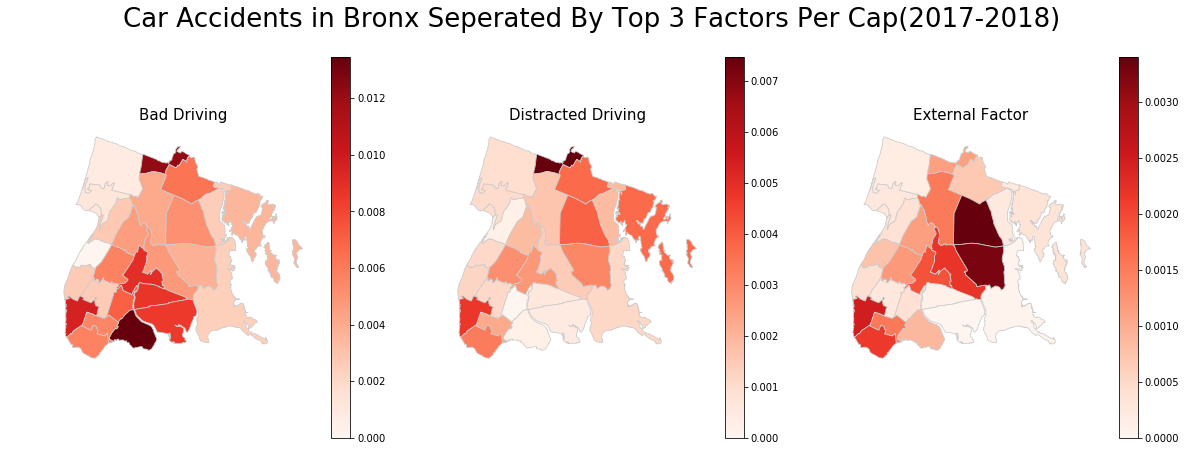

In [181]:
# set a variable that will call whatever column we want to visualise on the map
#variable = "Distracted Driving"
var_list = ['Bad Driving Per Cap','Distracted Driving Per Cap', 'External Factor Per Cap']
#var_list = ['Bad Driving','Distracted Driving', 'External Factor']#,\
             #'Poor Driving Conditions Per Cap','Unsafe Infrastructure Per Cap','Mechanical Failure Per Cap'\
             #,'Other Per Cap','Impaired Driving Per Cap']
title_list = ['Bad Driving','Distracted Driving','External Factor']#,'Poor Driving Conditions'\
               #,'Unsafe Infrastructure','Mechanical Failure','Other','Impaired Driving']
# create figure and axes for Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))
counter = 0
for row in range(0,3):
    #for item in range(0,4):
    Bronx.plot(column=var_list[counter], cmap='Reds', linewidth=0.8, ax=ax[row], edgecolor='0.8')
    # set the range for the choropleth
    vmin, vmax = 0, float(max(Bronx[var_list[counter]]))
    ax[row].axis('off')
    ax[row].set_title(title_list[counter],fontsize=15)
    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # empty array for the data range
    sm._A = []
    # add the colorbar to the figure
    cbar = fig.colorbar(sm,ax=ax[row])
    counter += 1

fig.suptitle("Car Accidents in Bronx Seperated By Top 3 Factors Per Cap(2017-2018)",fontsize=26)
# create an annotation for the data source
#plt.annotate('Source: NYC Open Data, 2018',xy=(0.2, .15),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
plt.savefig('heatmap_Manhattan')
plt.show()

In [167]:
def top3zipcode(df, factor):
    result = df.sort_values(by=[factor],ascending = False).head(6)[['ZIPCODE', factor]]
    return result

In [169]:
#Manhattan[Manhattan['Bad Driving'] == max(Manhattan['Bad Driving'])]
#new_index = [1,2,3]
total_zipcode = top3zipcode(Manhattan, var_list[0]).reset_index().drop('index', axis = 1)
#total_zipcode['Rank'] = [1,2,3]
#total_zipcode = total_zipcode.set_index('Rank')
#total_zipcode = total_zipcode.append(top3zipcode(Brooklyn, 'Bad Driving Per Cap'))
#total_zipcode = total_zipcode.append(top3zipcode(Bronx, 'Bad Driving Per Cap'))
#total_zipcode = total_zipcode.append(top3zipcode(Queens, 'Bad Driving Per Cap'))
#total_zipcode = total_zipcode.append(top3zipcode(Staten_Island, 'Bad Driving Per Cap'))
#total_zipcode = total_zipcode.reset_index().drop('index', axis = 1)
total_zipcode.drop(df.index[[1,2,3]])

,ZIPCODE,Bad Driving Per Cap
0,10018,0.114483
4,10004,0.042067
5,10001,0.036229


### BARGRAPH (Group by Borough) (Jason)

In [63]:
def groupby_borough(df):
    temp_df = df.groupby(['REASON','BOROUGH']).size().unstack().sort_values('REASON',ascending= True)#.head(3).T
    temp_df = temp_df/temp_df.sum(0)*100
    temp_df = temp_df.T
    return temp_df

In [60]:
#temp_df = df.groupby(['REASON','BOROUGH']).size().unstack().sort_values('REASON',ascending= True)#.head(3).T
#temp_df/temp_df.sum(0)*100

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
REASON,,,,,
Bad Driving,56.382568,51.844108,47.905629,52.028254,51.449859
Distracted Driving,21.069546,31.919898,37.251656,34.871439,30.024164
External Factor,11.826713,6.262455,7.657285,4.597815,6.443818
Impaired Driving,2.410336,2.554637,1.324503,2.425983,3.000403
Mechanical Failure,1.066975,1.048643,0.513245,0.818563,1.530407
Other,3.155933,3.227598,3.067053,2.158630,2.356021
Poor Driving Conditions,3.740841,2.763712,1.945364,2.845166,4.752316
Unsafe Infrastructure,0.347088,0.378949,0.335265,0.254151,0.443012


In [64]:
df_barh = groupby_borough(df)
df_barh.head()

REASON,Bad Driving,Distracted Driving,External Factor,Impaired Driving,Mechanical Failure,Other,Poor Driving Conditions,Unsafe Infrastructure
BOROUGH,,,,,,,,
BRONX,56.382568,21.069546,11.826713,2.410336,1.066975,3.155933,3.740841,0.347088
BROOKLYN,51.844108,31.919898,6.262455,2.554637,1.048643,3.227598,2.763712,0.378949
MANHATTAN,47.905629,37.251656,7.657285,1.324503,0.513245,3.067053,1.945364,0.335265
QUEENS,52.028254,34.871439,4.597815,2.425983,0.818563,2.158630,2.845166,0.254151
STATEN ISLAND,51.449859,30.024164,6.443818,3.000403,1.530407,2.356021,4.752316,0.443012


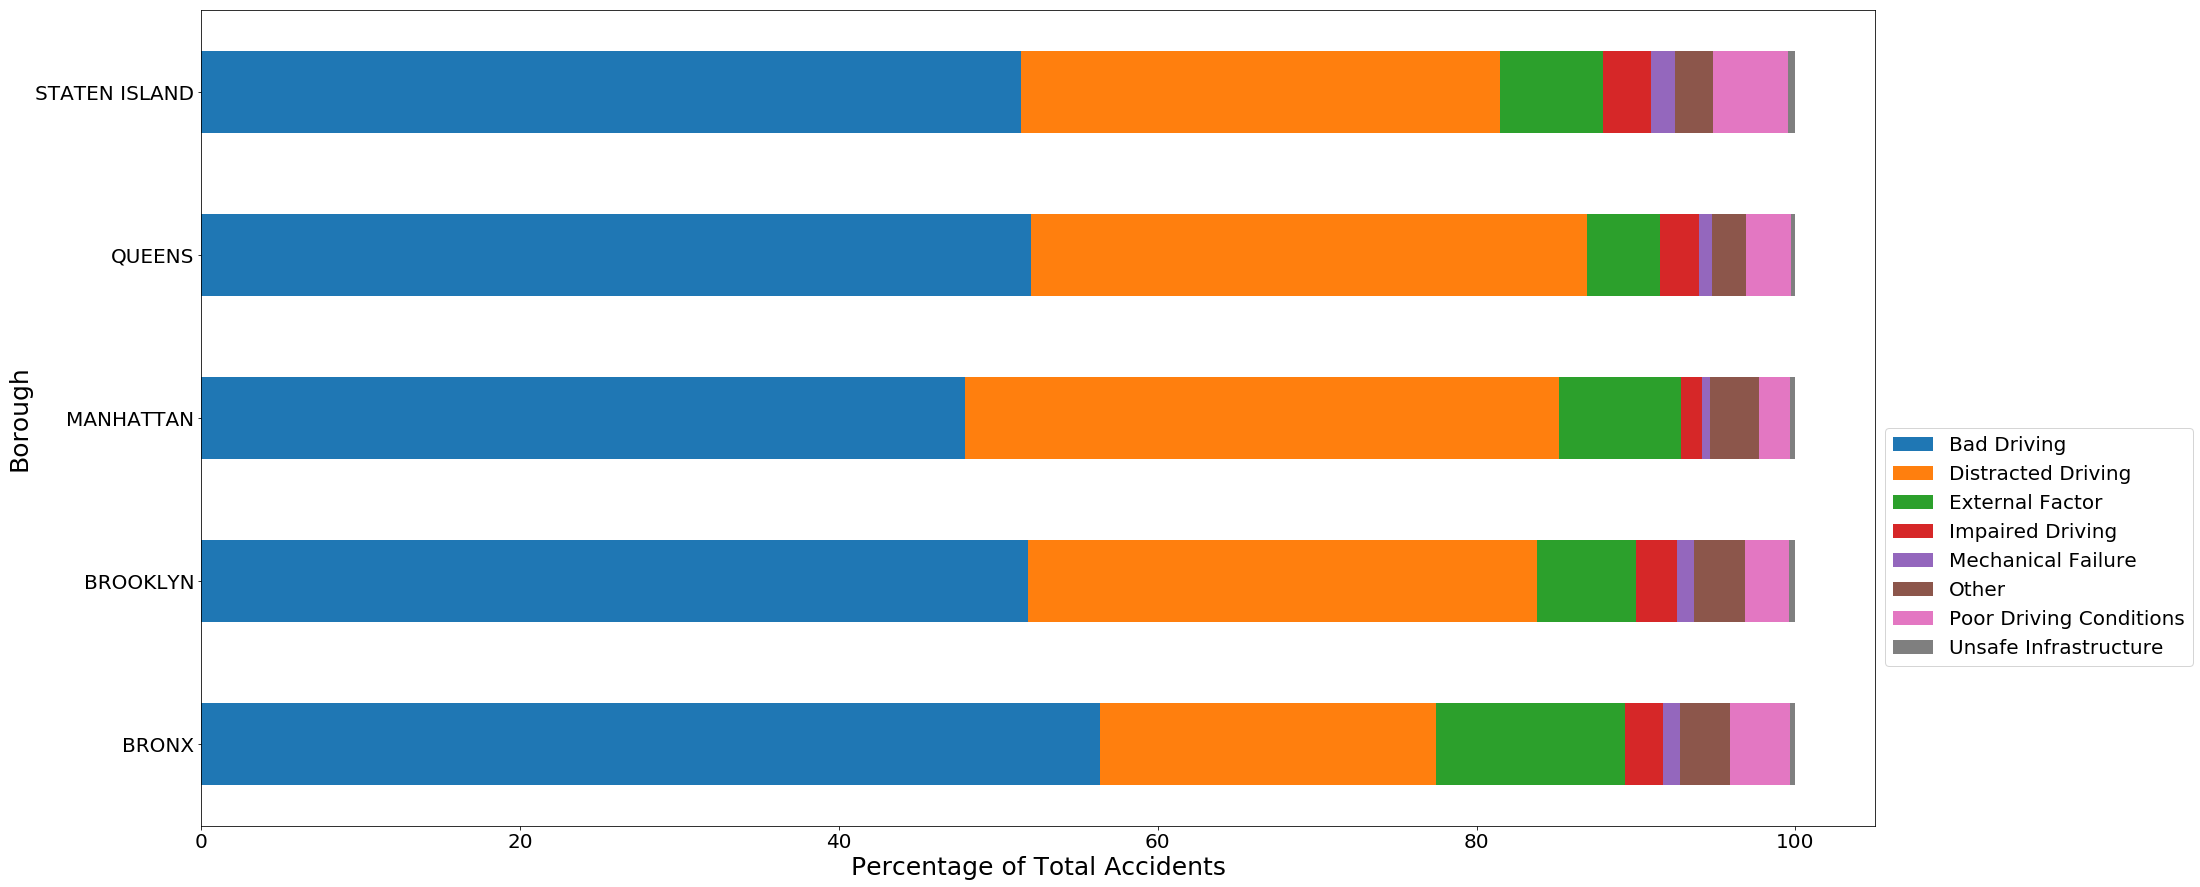

In [196]:
df_barh.plot(kind='barh', figsize=(30, 15),stacked=True)
plt.xlabel('Percentage of Total Accidents', fontsize=25)
plt.ylabel('Borough', fontsize=25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#plt.legend(loc=0, prop={'size': 15})
plt.legend(loc=0,bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.savefig('stacked_his.pdf')
plt.show()

In [185]:
temp1 = Brooklyn.set_index('ZIPCODE')#['Bad Driving Per Cap']

<BarContainer object of 40 artists>

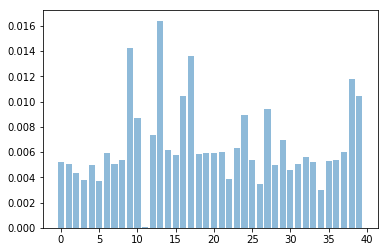

In [188]:
y_pos = np.arange(len(Brooklyn['ZIPCODE']))
 
plt.bar(y_pos, Brooklyn['Bad Driving Per Cap'], align='center', alpha=0.5)

In [7]:
import matplotlib.pyplot as plt

In [3]:
df.plot(x = "LATITUDE",y = "LONGITUDE")

NameError: name 'df' is not defined

In [17]:
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,REASON,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2
3724,2018-10-31,00:00:00,BRONX,10467,40.865360,-73.87043,0,0,0,0,0,0,0,External Factor,0,Reaction to Uninvolved Vehicle,Unspecified
3725,2018-10-31,00:00:00,BRONX,10473,40.812054,-73.85656,0,0,0,0,0,0,0,Distracted Driving,0,Driver Inattention/Distraction,Unspecified
3726,2018-10-31,00:00:00,BROOKLYN,11229,40.609238,-73.94923,0,0,0,0,0,0,0,External Factor,0,Reaction to Uninvolved Vehicle,NaN
3727,2018-10-31,00:00:00,MANHATTAN,10035,40.807438,-73.93873,0,0,0,0,0,0,0,Bad Driving,0,Backing Unsafely,Unspecified
3734,2018-10-31,00:40:00,MANHATTAN,10022,40.757637,-73.96342,0,0,0,0,0,0,0,Bad Driving,0,Failure to Yield Right-of-Way,Unspecified


In [2]:
from mpl_toolkits.basemap import Basemap

KeyError: 'PROJ_LIB'